# Clustering weather data

Here, we finally try to see what happens when we do clustering on all of our data.

### Data

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
plt.rcParams["font.family"] = "Arial"

c:\Users\Ian\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading in our data,

In [2]:
nov_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202311.csv")
dec_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202312.csv")
jan_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202401.csv")
feb_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202402.csv")
mar_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202403.csv")
apr_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202404.csv")

Cleaning our data

In [3]:
def clean(df):
    # Dropping other columns 
    df = df.drop(columns=['sys.sunrise', 'sys.sunset', 'weather.id', 'weather.main', 'weather.icon', 'weather.description', \
                                  'extraction_date_time', 'sys.type', 'sys.id'])
    
    # Interpolating data
    df_clean = df[df.columns.difference(['datetime', 'coord.lon', 'coord.lat', 'city_name', 'rain.1h'])].transform(\
    pd.DataFrame.interpolate)
    df_clean['rain.1h'] = df['rain.1h'] # leaving rain data alone and not interpolating
    df_clean.fillna(0, inplace=True) # zeroing out blank rain data

    df_clean.insert(0, 'city_name', df['city_name'])
    df_clean.insert(1, 'datetime', df['datetime'])
    
    # Removing the timezone in the date
    df_clean['datetime'] = pd.to_datetime(df_clean['datetime']).dt.tz_localize(None)

    # # Total seconds column
    if df_clean.iloc[0, 1].year == 2023: # need to distinguish whether it's from 2023 or 2024
        df_clean['total_second'] = (df_clean['datetime'] - pd.Timestamp('2023-01-01 00:00:00') ).dt.total_seconds()
    else: 
        df_clean['total_second'] = (df_clean['datetime'] - pd.Timestamp('2024-01-01 00:00:00') ).dt.total_seconds()
    
    return df_clean

In [4]:
months = [nov_data, dec_data, jan_data, feb_data, mar_data, apr_data]
clean_data = []

for i in range(len(months)):
    clean_data.append(clean(months[i]))

Next we concatenate our data. When concatenating duplicates may arise, and we have to drop one of the duplicates. That can be done by adding 

<center>

```.drop_duplicates().reset_index(drop=True)```

</center>

after the ```pd.concat()``` function. 

In [12]:
weather_data = pd.concat([clean_data[0], clean_data[1], clean_data[2], clean_data[3], clean_data[4], clean_data[5]]).drop_duplicates().reset_index(drop=True)
weather_data

,city_name,datetime,clouds.all,main.feels_like,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,main.temp_max,main.temp_min,visibility,wind.deg,wind.gust,wind.speed,rain.1h,total_second
0,Alaminos,2023-11-06 15:35:43,93.0,36.34,1007.0,70.0,1009.0,1009.0,30.52,30.52,30.52,10000.0,66.0,2.63,1.82,0.00,26753743.0
1,Angeles City,2023-11-06 15:45:07,40.0,42.25,1004.0,55.0,1010.0,1009.5,35.25,35.25,35.25,10000.0,90.0,4.05,3.09,0.00,26754307.0
2,Antipolo,2023-11-06 15:45:09,14.0,34.87,1001.0,72.0,1010.0,1010.0,29.74,29.74,29.74,10000.0,89.0,5.47,2.89,0.00,26754309.0
3,Bacolod,2023-11-06 15:45:11,66.0,34.34,1008.0,78.0,1009.0,1009.0,29.01,29.01,29.01,10000.0,66.0,7.71,5.41,0.00,26754311.0
4,Bacoor,2023-11-06 15:45:12,20.0,39.05,1008.0,72.0,1009.0,1008.5,32.05,33.99,30.58,10000.0,100.0,7.35,2.57,0.00,26754312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161096,Valencia,2024-04-23 12:10:04,68.0,38.83,994.0,40.0,1009.0,1009.0,35.84,35.84,35.84,10000.0,113.0,5.14,3.84,0.00,9807004.0
161097,Valenzuela,2024-04-23 12:10:07,41.0,41.65,996.0,69.0,1010.0,1009.0,34.65,35.99,32.20,10000.0,18.0,8.94,2.24,0.00,9807007.0
161098,Victorias,2024-04-23 12:10:09,76.0,38.39,998.0,63.0,1009.0,1009.0,32.15,32.15,32.15,10000.0,53.0,8.41,5.53,0.00,9807009.0
161099,Vigan,2024-04-23 12:10:10,51.0,42.52,998.0,71.0,1010.0,1009.0,35.52,35.52,35.52,10000.0,280.0,3.23,3.93,0.00,9807010.0


## Clustering with PCA

### Principal Component Analysis

Let's check how many PCA components we need for optimal reproduction of the data. 

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

weather_norm = normalize(weather_data.drop(columns=['city_name', 'datetime']))
eigvals = []

for n_comp in range(10):
    pca = PCA(n_components=n_comp)
    pca.fit(weather_norm)
    eigval =  pca.explained_variance_
    eigvals.append(eigval)

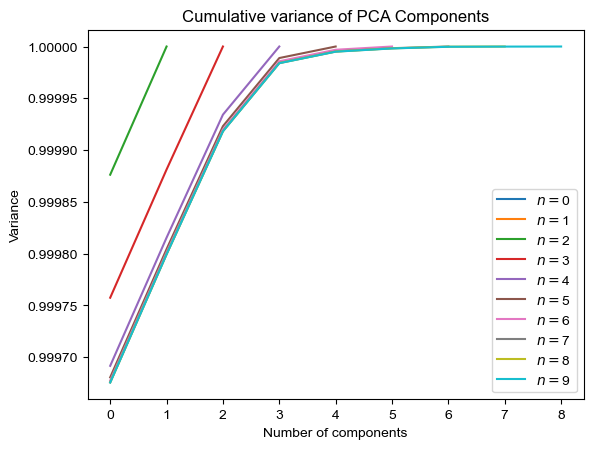

In [14]:
for eigval_graph in range(len(eigvals)):
    length = len(eigvals[eigval_graph])
    plt.plot(np.cumsum(eigvals[eigval_graph])/np.sum(eigvals[eigval_graph]), label=r'$n=${Length}'.format(Length=length))
plt.title('Cumulative variance of PCA Components')
plt.ylabel('Variance')
plt.xlabel('Number of components')
plt.legend()
plt.show()

Looks like 4 PCA components is already enough.

In [15]:
pca = PCA(n_components=4)
pca.fit(weather_norm)
weather_pca = pca.transform(weather_norm)

In [18]:
weather_pcadf = pd.DataFrame(weather_pca)
weather_pcadf.insert(0, 'city_name', weather_data['city_name']) # reinserting the city names
weather_pcadf.columns = ['city_name', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4']
weather_pcadf

,city_name,PCA_1,PCA_2,PCA_3,PCA_4
0,Alaminos,-0.003002,1.331611e-05,0.000036,2.429887e-07
1,Angeles City,-0.003002,1.411030e-05,0.000036,-3.844716e-08
2,Antipolo,-0.003002,1.405961e-05,0.000036,-1.380775e-07
3,Bacolod,-0.003002,1.330068e-05,0.000036,2.041424e-07
4,Bacoor,-0.003002,1.444868e-05,0.000036,-5.443339e-08
...,...,...,...,...,...
161096,Valencia,-0.002346,9.722751e-06,0.000022,-2.237739e-06
161097,Valenzuela,-0.002346,7.293217e-07,0.000025,-1.208370e-06
161098,Victorias,-0.002346,4.090941e-06,0.000024,-1.263819e-06
161099,Vigan,-0.002346,2.550870e-05,0.000016,-3.462518e-06


### K-means clustering

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
scaler = StandardScaler()

weather_pcadf[['PCA1_T', 'PCA2_T', 'PCA3_T', 'PCA4_T']] = scaler.fit_transform(weather_pcadf[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4']])
weather_pcadf

,city_name,PCA_1,PCA_2,PCA_3,PCA_4,PCA1_T,PCA2_T,PCA3_T,PCA4_T
0,Alaminos,-0.003002,1.331611e-05,0.000036,2.429887e-07,-0.418300,0.166757,0.462008,0.004173
1,Angeles City,-0.003002,1.411030e-05,0.000036,-3.844716e-08,-0.418302,0.176702,0.457570,-0.000660
2,Antipolo,-0.003002,1.405961e-05,0.000036,-1.380775e-07,-0.418304,0.176067,0.457430,-0.002371
3,Bacolod,-0.003002,1.330068e-05,0.000036,2.041424e-07,-0.418301,0.166563,0.461682,0.003506
4,Bacoor,-0.003002,1.444868e-05,0.000036,-5.443339e-08,-0.418301,0.180940,0.455471,-0.000935
...,...,...,...,...,...,...,...,...,...
161096,Valencia,-0.002346,9.722751e-06,0.000022,-2.237739e-06,-0.326965,0.121757,0.279381,-0.038432
161097,Valenzuela,-0.002346,7.293217e-07,0.000025,-1.208370e-06,-0.326974,0.009133,0.323198,-0.020753
161098,Victorias,-0.002346,4.090941e-06,0.000024,-1.263819e-06,-0.326965,0.051231,0.307307,-0.021705
161099,Vigan,-0.002346,2.550870e-05,0.000016,-3.462518e-06,-0.326930,0.319443,0.198827,-0.059467


Let's check how many clusters we need for the data.

In [32]:
def optimize_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)


    # Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-', label='Inertia')
    plt.plot(means, np.diff(np.array(inertias), prepend=inertias[0]), 'o-', label='Difference')
    plt.title('K-means clustering inertias')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.axhline(y=0, xmin=1, xmax=9, linestyle='--')
    plt.legend()
    plt.show

    return None

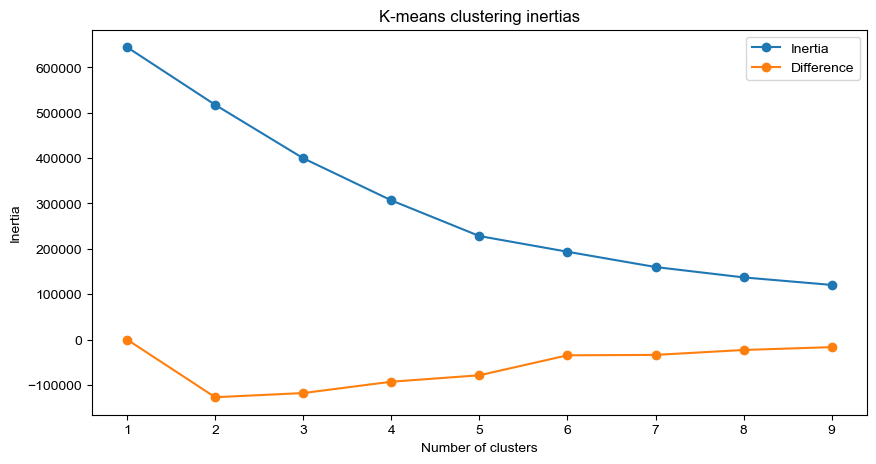

In [30]:
optimize_means(weather_pcadf[['PCA1_T', 'PCA2_T', 'PCA3_T', 'PCA4_T']], 10)

Fuck u, let's do 4 clusters

In [35]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(weather_pcadf[['PCA1_T', 'PCA2_T', 'PCA3_T', 'PCA4_T']])

KMeans(n_clusters=4)

Adding the labels of the clusters back to the data:

In [36]:
weather_pcadf['category'] = kmeans.labels_
weather_pcadf

,city_name,PCA_1,PCA_2,PCA_3,PCA_4,PCA1_T,PCA2_T,PCA3_T,PCA4_T,category
0,Alaminos,-0.003002,1.331611e-05,0.000036,2.429887e-07,-0.418300,0.166757,0.462008,0.004173,0
1,Angeles City,-0.003002,1.411030e-05,0.000036,-3.844716e-08,-0.418302,0.176702,0.457570,-0.000660,0
2,Antipolo,-0.003002,1.405961e-05,0.000036,-1.380775e-07,-0.418304,0.176067,0.457430,-0.002371,0
3,Bacolod,-0.003002,1.330068e-05,0.000036,2.041424e-07,-0.418301,0.166563,0.461682,0.003506,0
4,Bacoor,-0.003002,1.444868e-05,0.000036,-5.443339e-08,-0.418301,0.180940,0.455471,-0.000935,0
...,...,...,...,...,...,...,...,...,...,...
161096,Valencia,-0.002346,9.722751e-06,0.000022,-2.237739e-06,-0.326965,0.121757,0.279381,-0.038432,0
161097,Valenzuela,-0.002346,7.293217e-07,0.000025,-1.208370e-06,-0.326974,0.009133,0.323198,-0.020753,0
161098,Victorias,-0.002346,4.090941e-06,0.000024,-1.263819e-06,-0.326965,0.051231,0.307307,-0.021705,0
161099,Vigan,-0.002346,2.550870e-05,0.000016,-3.462518e-06,-0.326930,0.319443,0.198827,-0.059467,0


In [37]:
weather_pcadf.groupby(['city_name'])['category'].mean()

city_name
Alaminos          0.203259
Angeles City      0.200686
Antipolo          0.202064
Bacolod           0.202412
Bacoor            0.204134
                    ...   
Valencia          0.203085
Valenzuela        0.202911
Victorias         0.202911
Vigan             0.202911
Zamboanga City    0.206336
Name: category, Length: 138, dtype: float64

## Clustering without PCA

Let's try clustering the data without PCA

In [40]:
weather_drop = weather_data.drop(columns=['city_name', 'datetime'])
weather_drop

,clouds.all,main.feels_like,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,main.temp_max,main.temp_min,visibility,wind.deg,wind.gust,wind.speed,rain.1h,total_second
0,93.0,36.34,1007.0,70.0,1009.0,1009.0,30.52,30.52,30.52,10000.0,66.0,2.63,1.82,0.00,26753743.0
1,40.0,42.25,1004.0,55.0,1010.0,1009.5,35.25,35.25,35.25,10000.0,90.0,4.05,3.09,0.00,26754307.0
2,14.0,34.87,1001.0,72.0,1010.0,1010.0,29.74,29.74,29.74,10000.0,89.0,5.47,2.89,0.00,26754309.0
3,66.0,34.34,1008.0,78.0,1009.0,1009.0,29.01,29.01,29.01,10000.0,66.0,7.71,5.41,0.00,26754311.0
4,20.0,39.05,1008.0,72.0,1009.0,1008.5,32.05,33.99,30.58,10000.0,100.0,7.35,2.57,0.00,26754312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161096,68.0,38.83,994.0,40.0,1009.0,1009.0,35.84,35.84,35.84,10000.0,113.0,5.14,3.84,0.00,9807004.0
161097,41.0,41.65,996.0,69.0,1010.0,1009.0,34.65,35.99,32.20,10000.0,18.0,8.94,2.24,0.00,9807007.0
161098,76.0,38.39,998.0,63.0,1009.0,1009.0,32.15,32.15,32.15,10000.0,53.0,8.41,5.53,0.00,9807009.0
161099,51.0,42.52,998.0,71.0,1010.0,1009.0,35.52,35.52,35.52,10000.0,280.0,3.23,3.93,0.00,9807010.0


Using the ```StandardScaler``` to the data:

In [45]:
weather_scaled = scaler.fit_transform(weather_drop[['clouds.all', 'main.feels_like', 'main.grnd_level',	'main.humidity', 'main.pressure', 'main.sea_level',	'main.temp', \
                                                    	'main.temp_max', 'main.temp_min', 'visibility',	'wind.deg',	'wind.gust', 'wind.speed', 'rain.1h', 'total_second']])
weather_scaled = pd.DataFrame(weather_scaled)
weather_scaled.columns = ['clouds.all', 'main.feels_like', 'main.grnd_level', 'main.humidity', 'main.pressure', 'main.sea_level', 'main.temp', \
                                                    	'main.temp_max', 'main.temp_min', 'visibility',	'wind.deg',	'wind.gust', 'wind.speed', 'rain.1h', 'total_second']
weather_scaled.insert(0, 'city_name', weather_data['city_name'])
weather_scaled

,city_name,clouds.all,main.feels_like,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,main.temp_max,main.temp_min,visibility,wind.deg,wind.gust,wind.speed,rain.1h,total_second
0,Alaminos,1.067548,1.640645,0.172651,-0.443060,-1.474878,-1.465165,1.153098,1.047900,1.262073,0.115568,-0.431215,-0.844584,-0.741890,-0.095337,1.347696
1,Angeles City,-0.462850,2.931351,0.017585,-1.556570,-1.081824,-1.263564,2.644293,2.484930,2.804581,0.115568,-0.173237,-0.335557,-0.069260,-0.095337,1.347747
2,Antipolo,-1.213611,1.319606,-0.137481,-0.294592,-1.081824,-1.061963,0.907192,0.810926,1.007706,0.115568,-0.183986,0.173470,-0.175186,-0.095337,1.347747
3,Bacolod,0.287912,1.203858,0.224339,0.150813,-1.474878,-1.465165,0.677050,0.589144,0.769645,0.115568,-0.431215,0.976443,1.159483,-0.095337,1.347747
4,Bacoor,-1.040358,2.232491,0.224339,-0.294592,-1.474878,-1.666766,1.635451,2.102127,1.281640,0.115568,-0.065746,0.847393,-0.344668,-0.095337,1.347747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161096,Valencia,0.345663,2.184445,-0.499301,-2.670081,-1.474878,-1.465165,2.830298,2.664179,2.996986,0.115568,0.073993,0.055175,0.327963,-0.095337,-0.178271
161097,Valenzuela,-0.433974,2.800315,-0.395924,-0.517294,-1.081824,-1.465165,2.455135,2.709751,1.809941,0.115568,-0.947172,1.417360,-0.519446,-0.095337,-0.178270
161098,Victorias,0.576666,2.088352,-0.292547,-0.962698,-1.474878,-1.465165,1.666977,1.543113,1.793635,0.115568,-0.570953,1.227371,1.223039,-0.095337,-0.178270
161099,Vigan,-0.145220,2.990317,-0.292547,-0.368826,-1.081824,-1.465165,2.729414,2.566959,2.892631,0.115568,1.869093,-0.629502,0.375630,-0.095337,-0.178270


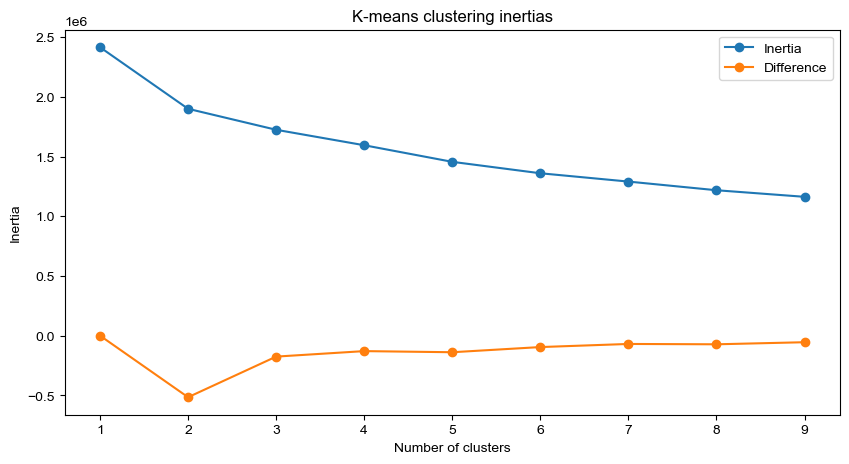

In [49]:
optimize_means(weather_scaled.drop(['city_name'], axis=1), 10)

Looks like we need 6 clusters.

In [50]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(weather_scaled.drop(['city_name'], axis=1))

KMeans(n_clusters=6)

In [52]:
weather_scaled['category'] = kmeans.labels_
weather_scaled

,city_name,clouds.all,main.feels_like,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,main.temp_max,main.temp_min,visibility,wind.deg,wind.gust,wind.speed,rain.1h,total_second,category
0,Alaminos,1.067548,1.640645,0.172651,-0.443060,-1.474878,-1.465165,1.153098,1.047900,1.262073,0.115568,-0.431215,-0.844584,-0.741890,-0.095337,1.347696,0
1,Angeles City,-0.462850,2.931351,0.017585,-1.556570,-1.081824,-1.263564,2.644293,2.484930,2.804581,0.115568,-0.173237,-0.335557,-0.069260,-0.095337,1.347747,0
2,Antipolo,-1.213611,1.319606,-0.137481,-0.294592,-1.081824,-1.061963,0.907192,0.810926,1.007706,0.115568,-0.183986,0.173470,-0.175186,-0.095337,1.347747,0
3,Bacolod,0.287912,1.203858,0.224339,0.150813,-1.474878,-1.465165,0.677050,0.589144,0.769645,0.115568,-0.431215,0.976443,1.159483,-0.095337,1.347747,0
4,Bacoor,-1.040358,2.232491,0.224339,-0.294592,-1.474878,-1.666766,1.635451,2.102127,1.281640,0.115568,-0.065746,0.847393,-0.344668,-0.095337,1.347747,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161096,Valencia,0.345663,2.184445,-0.499301,-2.670081,-1.474878,-1.465165,2.830298,2.664179,2.996986,0.115568,0.073993,0.055175,0.327963,-0.095337,-0.178271,0
161097,Valenzuela,-0.433974,2.800315,-0.395924,-0.517294,-1.081824,-1.465165,2.455135,2.709751,1.809941,0.115568,-0.947172,1.417360,-0.519446,-0.095337,-0.178270,0
161098,Victorias,0.576666,2.088352,-0.292547,-0.962698,-1.474878,-1.465165,1.666977,1.543113,1.793635,0.115568,-0.570953,1.227371,1.223039,-0.095337,-0.178270,0
161099,Vigan,-0.145220,2.990317,-0.292547,-0.368826,-1.081824,-1.465165,2.729414,2.566959,2.892631,0.115568,1.869093,-0.629502,0.375630,-0.095337,-0.178270,0


Let's group by city names and see what kinds of categories we got for each city:

In [55]:
category_list = weather_scaled.groupby(['city_name'])['category'].apply(list).reset_index(name='categories')
category_list

,city_name,categories
0,Alaminos,"[0, 1, 1, 4, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, ..."
1,Angeles City,"[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 3, ..."
2,Antipolo,"[0, 4, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 4, 1, ..."
3,Bacolod,"[0, 4, 1, 1, 0, 1, 4, 4, 0, 4, 1, 4, 0, 4, 1, ..."
4,Bacoor,"[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 3, ..."
...,...,...
133,Valencia,"[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ..."
134,Valenzuela,"[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, ..."
135,Victorias,"[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 4, 1, 0, 1, 1, ..."
136,Vigan,"[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, ..."


It's a mess. Not one city belonged to one specific cluster. Each city had different cluster classification.

In [60]:
citynames = category_list['city_name'].to_numpy()
categories = category_list['categories'].to_numpy()

Text(0.5, 1.0, 'Category histogram of clusters')

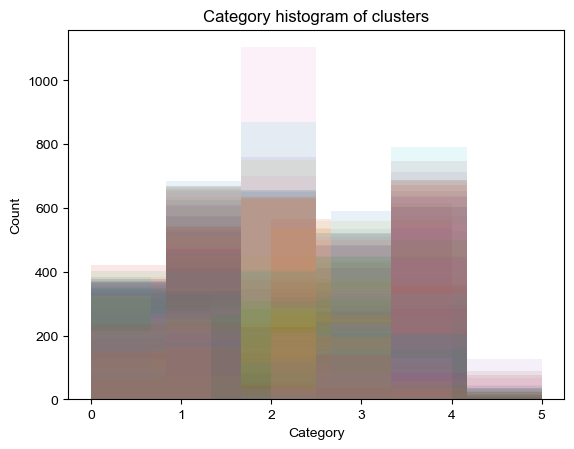

In [62]:
for city in range(len(citynames)):
    plt.hist(categories[city], bins=6, alpha=0.1)
plt.ylabel('Count')
plt.xlabel('Category')
plt.title('Category histogram of clusters')